# Import req. modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,jobs_state,same_state,age,python_des.,R_studio_des.,spark_des.,aws_des.,excel_des.
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1


# Feature Eng.

In [ ]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
df['jobs_simp'] = df['Job Title'].apply(title_simplifier)
df['seniority'] = df['Job Title'].apply(seniority)
		
##  Fix state Los Angeles 
df['job state']= df.jobs_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.jobs_state.value_counts()
df.drop('job state', inplace = True, axis = 1)

##  Job description length 
df['des_length'] = df['Job Description'].apply(lambda x: len(x))

##  Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

## hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

#remove new line from job title
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

df.to_csv('EDA_data.csv',index=False)

# EDA

In [49]:
df.describe()

,Rating,Founded,hourly,Employer_provider,min_salary,max_salary,avg_salary,same_state,age,python_des.,R_studio_des.,spark_des.,aws_des.,excel_des.,des_length,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.001348,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.036711,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


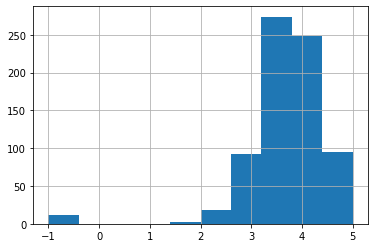

In [50]:
df.Rating.hist()

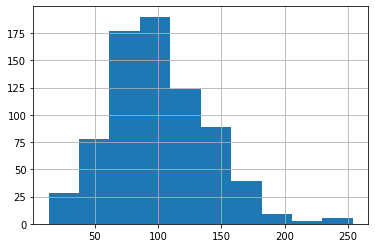

In [51]:
df.avg_salary.hist()

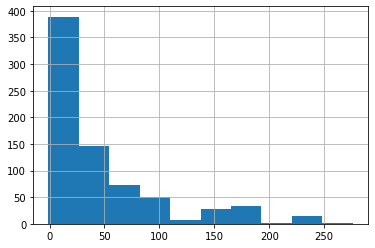

In [52]:
df.age.hist()

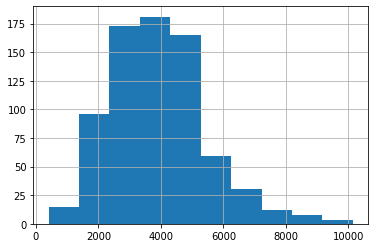

In [55]:
df.des_length.hist()

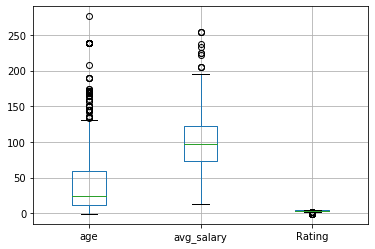

In [57]:
df.boxplot(column = ['age','avg_salary','Rating'])

In [60]:
df[['age','avg_salary','Rating','des_length']].corr()

,age,avg_salary,Rating,des_length
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
des_length,0.165090,0.078093,-0.012631,1.000000


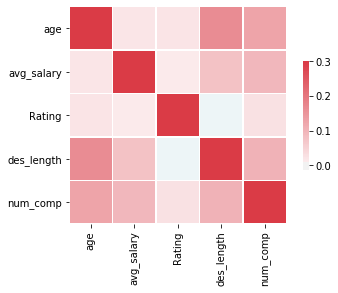

In [62]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','des_length','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'jobs_state','same_state', 'python_des.', 'R_studio_des.',
       'spark_des.', 'aws_des.', 'excel_des.', 'jobs_simp', 'seniority']]

graph for Location: total = 200


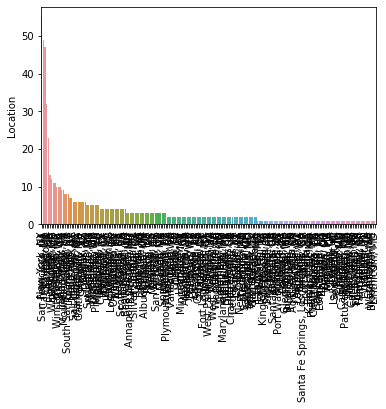

graph for Headquarters: total = 198


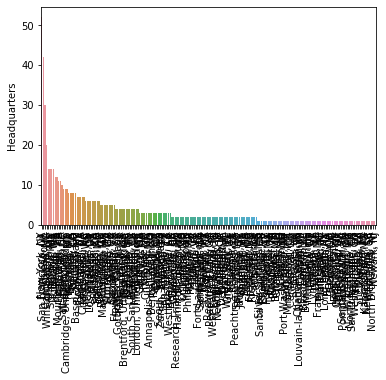

graph for Size: total = 9


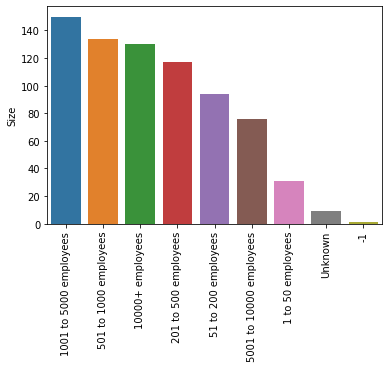

graph for Type of ownership: total = 11


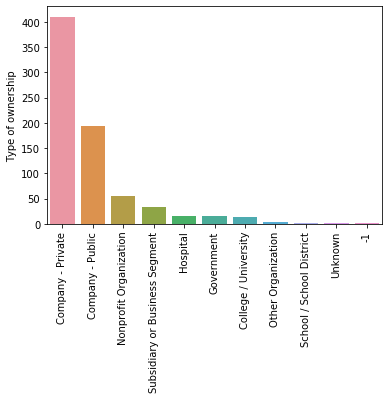

graph for Industry: total = 60


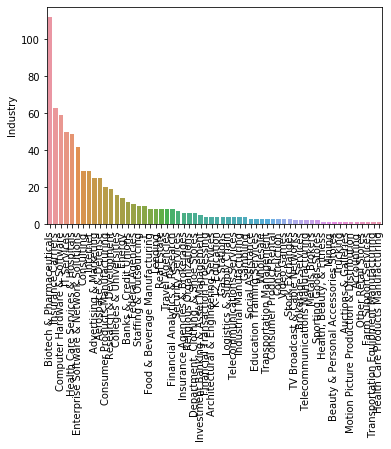

graph for Sector: total = 25


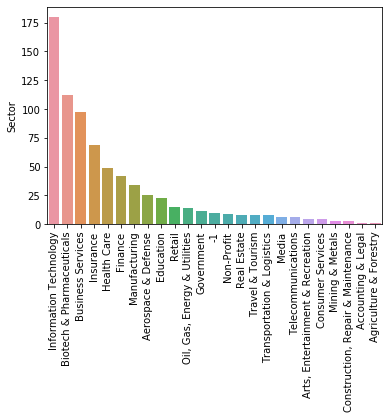

graph for Revenue: total = 14


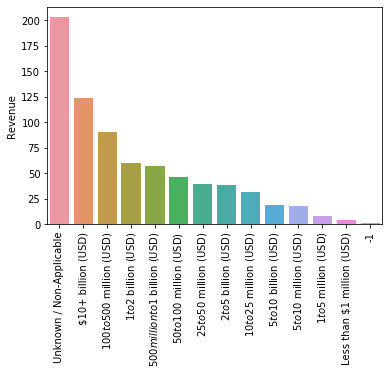

graph for company_txt: total = 343


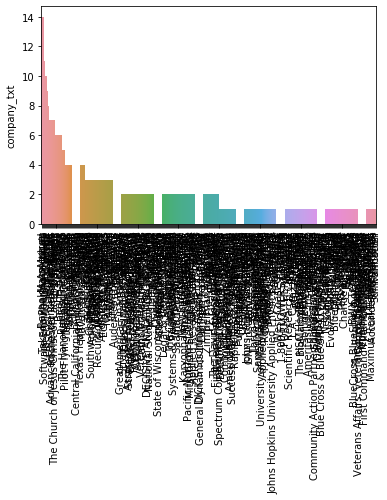

graph for jobs_state: total = 38


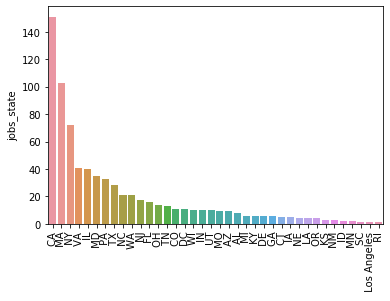

graph for same_state: total = 2


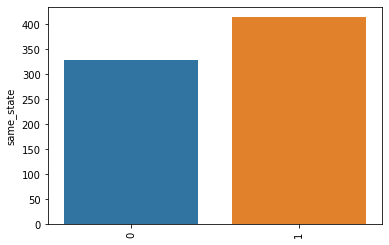

graph for python_des.: total = 2


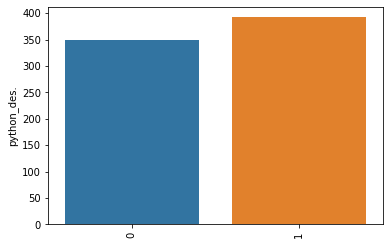

graph for R_studio_des.: total = 2


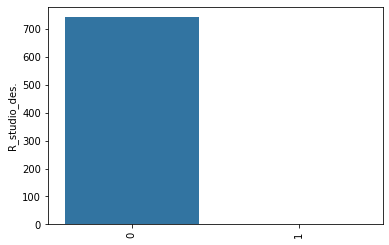

graph for spark_des.: total = 2


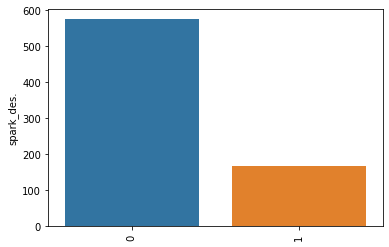

graph for aws_des.: total = 2


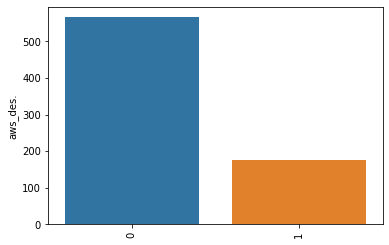

graph for excel_des.: total = 2


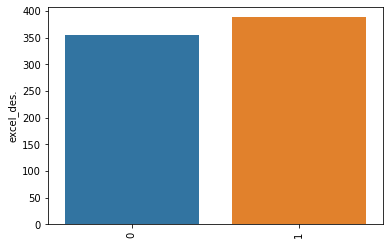

graph for jobs_simp: total = 7


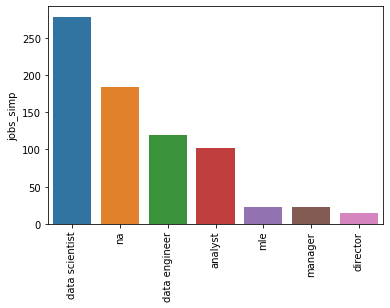

graph for seniority: total = 3


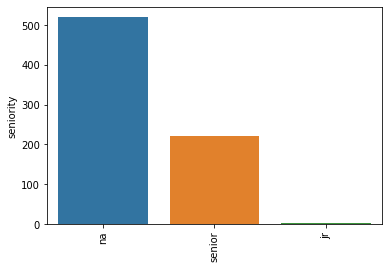

In [68]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


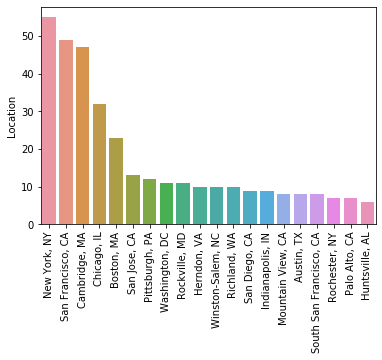

graph for Headquarters: total = 20


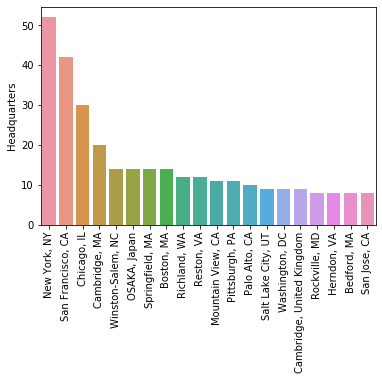

graph for company_txt: total = 20


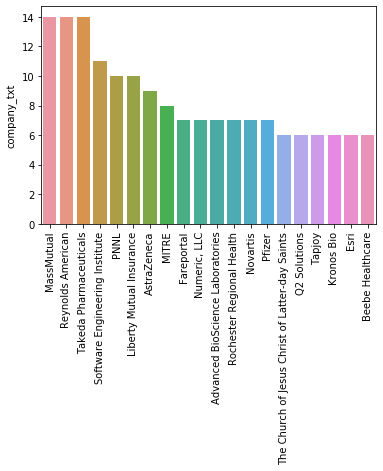

In [70]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [71]:
pd.pivot_table(df, index='jobs_simp', values = 'avg_salary')

,avg_salary
jobs_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [72]:
pd.pivot_table(df, index=['jobs_simp','seniority'], values = 'avg_salary')

avg_salary
jobs_simp      seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [76]:
pd.pivot_table(df, index=['jobs_state','jobs_simp'], values = 'avg_salary').sort_values('jobs_state',ascending = False)

avg_salary
jobs_state jobs_simp                 
 WI        na               54.000000
           data scientist  113.500000
           analyst          58.833333
 WA        na               97.500000
           data scientist   99.764706
...                               ...
 AZ        analyst          55.000000
           na              124.500000
 AL        na               43.750000
           data engineer    65.000000
           analyst          62.200000

[115 rows x 1 columns]

In [77]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [79]:
pd.pivot_table(df, index=['jobs_state','jobs_simp'], values = 'avg_salary',aggfunc = 'count').sort_values('jobs_state',ascending = False)

avg_salary
jobs_state   jobs_simp                 
 WI          na                       4
             data scientist           3
             analyst                  3
 WA          na                       1
             data scientist          17
             analyst                  3
 VA          na                       5
             mle                      2
             data scientist          18
             data engineer           10
             analyst                  6
 UT          data engineer            3
             analyst                  4
             data scientist           3
 TX          na                       7
             data scientist          13
             data engineer            8
 TN          data scientist           1
             data engineer           10
             analyst                  2
 SC          na                       1
 RI          analyst                  1
 PA          manager                  3
             data engineer            1
             data scientist           6
             analyst                  8
             mle                      7
             na                       8
 OR          data scientist           3
             data engineer            1
 OH          na                       3
             data scientist           7
             analyst                  4
 NY          na                      12
             mle                      2
             data scientist          40
             data engineer            4
             analyst                 14
 NM          data scientist           3
 NJ          data scientist           4
             analyst                  6
             data engineer            2
             manager                  2
             director                 2
             na                       1
 NE          na                       4
 NC          na                      12
             data scientist           3
             data engineer            6
 MO          na                       3
             manager                  1
             data scientist           3
             analyst                  2
 MN          data engineer            1
             analyst                  1
 MI          data scientist           4
             manager                  2
 MD          na                      16
             data scientist          13
             data engineer            3
             analyst                  3
 MA          na                      46
             manager                  5
             director                 6
             data scientist          30
             data engineer           12
             analyst                  4
 Los Angeles data scientist           1
 LA          analyst                  1
             data engineer            2
             na                       1
 KY          na                       4
             data scientist           2
 KS          mle                      3
 IN          na                       4
             data scientist           2
             data engineer            4
 IL          analyst                  3
             na                       6
             mle                      2
             director                 6
             data scientist          15
             data engineer            8
 ID          analyst                  2
 IA          analyst                  2
             data engineer            3
 GA          data scientist           3
             na                       3
 FL          data scientist           7
             data engineer            3
             analyst                  6
 DE          na                       6
 DC          data scientist           5
             data engineer            4
             analyst                  2
 CT          na                       3
             data scientist           2
 CO          mle                      1
             data engineer   

In [81]:
pd.pivot_table(df[df.jobs_simp == 'data scientist'], index=['jobs_state','jobs_simp'], values = 'avg_salary').sort_values('avg_salary',ascending = False)

,,avg_salary
jobs_state,jobs_simp,
DC,data scientist,149.000000
CA,data scientist,143.044776
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [87]:
# rating, industry, sector, revenue, num of comp, hourly, employer provided, python, r, spark, aws, excel, des_length, type of ownership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'Employer_provider', 'python_des.', 'R_studio_des.', 'spark_des.', 'aws_des.', 'excel_des.', 'Type of ownership','avg_salary']]

In [92]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values= 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [94]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_des.', values= 'avg_salary', aggfunc = 'count')

python_des.,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
